In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as ptl
import os
import math
import glob
import shutil

In [3]:
root_dir = "Files"
number_of_images = {}

for dir in os.listdir(root_dir):
    number_of_images[dir] = len(os.listdir(os.path.join(root_dir, dir)))

In [4]:
number_of_images.items()

dict_items([('no', 6), ('yes', 6)])

In [5]:
# if not os.path.exists("./test"):
#     os.mkdir("./test")
#     for dir in os.listdir(root_dir):
#         os.makedirs("./test/" + dir)
#         for img in np.random.choice(a = os.listdir(os.path.join(root_dir, dir)), 
#                                     size = (math.floor(15/100*number_of_images[dir])-2), 
#                                     replace = False):
#             o = os.path.join(root_dir, dir, img)
#             d = os.path.join("./test", dir)
#             shutil.copy(o, d)
#             os.remove(o)
# else:
#     print("folder already exists")

In [6]:
def createFolder(path, split):
    if not os.path.exists("./" + path):
        os.mkdir("./" + path)
        for dir in os.listdir(root_dir):
            os.makedirs("./" + path + "/" + dir)
            for img in np.random.choice(a = os.listdir(os.path.join(root_dir, dir)), 
                                        size = (math.floor(split*number_of_images[dir])-2), 
                                        replace = False):
                o = os.path.join(root_dir, dir, img)
                d = os.path.join("./" + path, dir)
                shutil.copy(o, d)
                os.remove(o)
    else:
        print("folder already exists")

In [7]:
createFolder("train", 70/100)

folder already exists


In [8]:
createFolder("validation", 15/100)

folder already exists


In [9]:
createFolder("test", 0.15)

folder already exists


In [10]:
import keras

In [11]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential

In [12]:
from tensorflow.keras.utils import load_img, img_to_array

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', input_shape = (224, 224, 3)))

model.add(Conv2D(filters = 36, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Dropout(rate = 0.25))

model.add(Flatten())

model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [15]:
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
def preprocessingImage(path):
    Image_data = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, rescale = 1/255, horizontal_flip = True)
    image = Image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = 'binary')
    return image

In [18]:
train_data = preprocessingImage("train")

Found 2096 images belonging to 2 classes.


In [19]:
def preprocessingImage2(path):
    Image_data = ImageDataGenerator(rescale = 1/255)
    image = Image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = 'binary')
    return image

In [20]:
test_data = preprocessingImage2("test")

Found 446 images belonging to 2 classes.


In [21]:
val_data = preprocessingImage2("validation")

Found 446 images belonging to 2 classes.


In [22]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [23]:
es = EarlyStopping(monitor = "val_accuracy", min_delta = 0.01, patience = 3, verbose = 1, mode = 'auto')
modelcheckPoint =  ModelCheckpoint(monitor = "val_accuracy", filepath = "./bestModel.h5", verbose = 1, save_best_only = True, mode = 'auto')
cd = [es, modelcheckPoint]

In [26]:
hs = model.fit_generator(generator = train_data, steps_per_epoch = 8, epochs = 30, verbose = 1, validation_data = val_data, validation_steps = 16, callbacks = cd)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.8379 - accuracy: 0.5781WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 16 batches). You may need to use the repeat() function when building your dataset.

Epoch 1: val_accuracy improved from -inf to 0.50224, saving model to .\bestModel.h5
8/8 [==============================] - 69s 8s/step - loss: 0.8379 - accuracy: 0.5781 - val_loss: 0.6819 - val_accuracy: 0.5022
Epoch 2/30
8/8 [==============================] - 41s 5s/step - loss: 0.6565 - accuracy: 0.6055
Epoch 3/30
8/8 [==============================] - 40s 5s/step - loss: 0.6535 - accuracy: 0.6055
Epoch 4/30
8/8 [==============================] - 41s 5s/step - loss: 0.5773 - accuracy: 0.6914
Epoch 5/30
8/8 [==============================] - 41s 5s/step - loss: 0.5572 - accuracy: 0.6992
Epoch 6/30
8/8 [==============================]

8/8 [==============================] - 43s 5s/step - loss: 0.4388 - accuracy: 0.8008
Epoch 22/30
8/8 [==============================] - 43s 5s/step - loss: 0.4753 - accuracy: 0.7852
Epoch 23/30
8/8 [==============================] - 44s 5s/step - loss: 0.4565 - accuracy: 0.7969
Epoch 24/30
8/8 [==============================] - 44s 5s/step - loss: 0.3140 - accuracy: 0.9023
Epoch 25/30
8/8 [==============================] - 42s 5s/step - loss: 0.4085 - accuracy: 0.8398
Epoch 26/30
8/8 [==============================] - 43s 5s/step - loss: 0.3773 - accuracy: 0.8438
Epoch 27/30
8/8 [==============================] - 44s 5s/step - loss: 0.3806 - accuracy: 0.8438
Epoch 28/30
8/8 [==============================] - 42s 5s/step - loss: 0.3765 - accuracy: 0.8359
Epoch 29/30
8/8 [==============================] - 42s 5s/step - loss: 0.4109 - accuracy: 0.8164
Epoch 30/30
8/8 [==============================] - 44s 5s/step - loss: 0.3811 - accuracy: 0.8203


In [29]:
h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

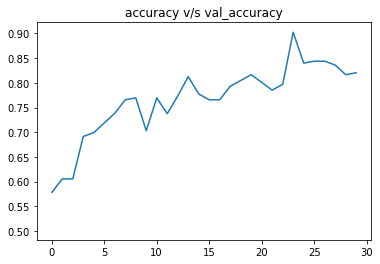

In [31]:
ptl.plot(h['accuracy'])
ptl.plot(h['val_accuracy'])
ptl.title('accuracy v/s val_accuracy')
ptl.show()

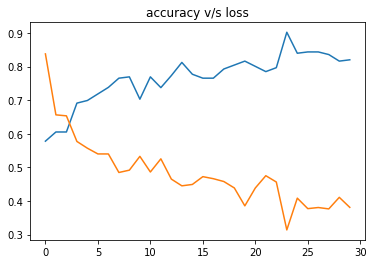

In [32]:
ptl.plot(h['accuracy'])
ptl.plot(h['loss'])
ptl.title('accuracy v/s loss')
ptl.show()

In [33]:
from keras.models import load_model

In [34]:
model = load_model("bestModel.h5")

In [37]:
accuracy = model.evaluate_generator(test_data)[1]
print(accuracy)

0.5044842958450317


In [40]:
path = "test/yes/y1042.jpg"
image = load_img(path, target_size = (224, 224))

In [42]:
input_image = img_to_array(image)/255

In [44]:
input_image.shape

(224, 224, 3)

In [48]:
input_image = np.expand_dims(input_image, axis = 0)

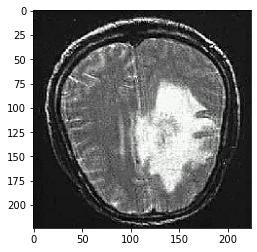

In [56]:
ptl.imshow(image)
ptl.show()